In [32]:
#using the exclamation turns this into a shell command... 
#Downloading for spotify
!pip install spotipy


!pip install seaborn

#Downloading all files from requirements folder. 
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 9.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [33]:
import os
from dotenv import load_dotenv
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')


In [34]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id="0c944c1c977a40ff9fcf6c419474ffec",
client_secret="cca29e3ac2444a65975937267b43aa6b"))


In [35]:


artist_id = "1grN0519h2zYqpRtYbDZAl"

response = con.artist_top_tracks(artist_id)
if response:
  # We keep the "tracks" object of the answer
  tracks = response["tracks"]
  # We select, for each song, the data we are interested in and discard the rest
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

In [36]:
import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head())

   duration_ms                           name  popularity
8     3.168167                  The Good Kind          49
0     2.742933  Without You (Blxst Interlude)          52
3     3.608833             Chops on the Blade          54
9     2.978517    Pop Out (feat. ScHoolboy Q)          55
7     3.240883                  Palisades, CA          56


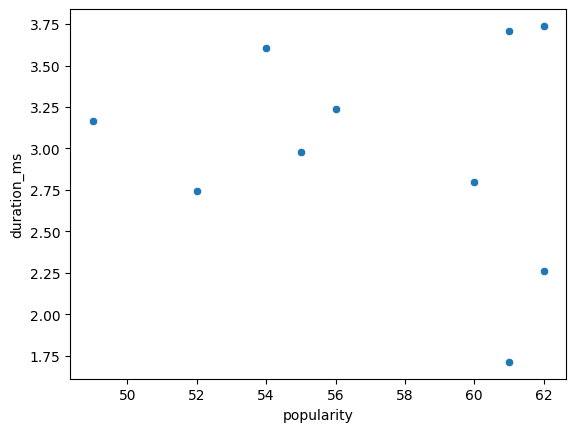

In [38]:
import seaborn as sns

scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")



This graph shows the corerelation between the popularity of Larry Junes songs and the duration of the songs. There doesn't mean to be much any relationship between the length of the songs and the popularity. I'd advise Larry June to continue to make songs withoutworrying about how long they are. 